### Conclusions :
#### 1. There are 9 Stations which we have data for.
#### 2. USC00519281', 'WAIHEE , HI US is the most active station in the data. 
#### 3. May and September are the months with most percipitation. 
#### 4. Highest occurance of temperature range is 70 - 72 degrees Fahrenheit

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
Base.classes.measurement

sqlalchemy.ext.automap.measurement

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Setting insector to get the name of the tables. 
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Getting all the column names in the measurement table
columns = inspector.get_columns("measurement")
for col in columns:
    print(col["name"],col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Getting all the data from the Measurement table.
engine.execute('SELECT * FROM measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

# Exploratory Precipitation Analysis

In [13]:
# Findig the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23')

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

In [15]:
# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_year

datetime.date(2016, 8, 23)

In [16]:
# Perform a query to retrieve the data and precipitation scores
perc_score = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= last_year).all()
perc_score

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column Sort the dataframe by date
perc_df = pd.DataFrame(perc_score)
final_perc = perc_df.set_index('date').dropna()
final_perc = final_perc.sort_values(by=['date'])

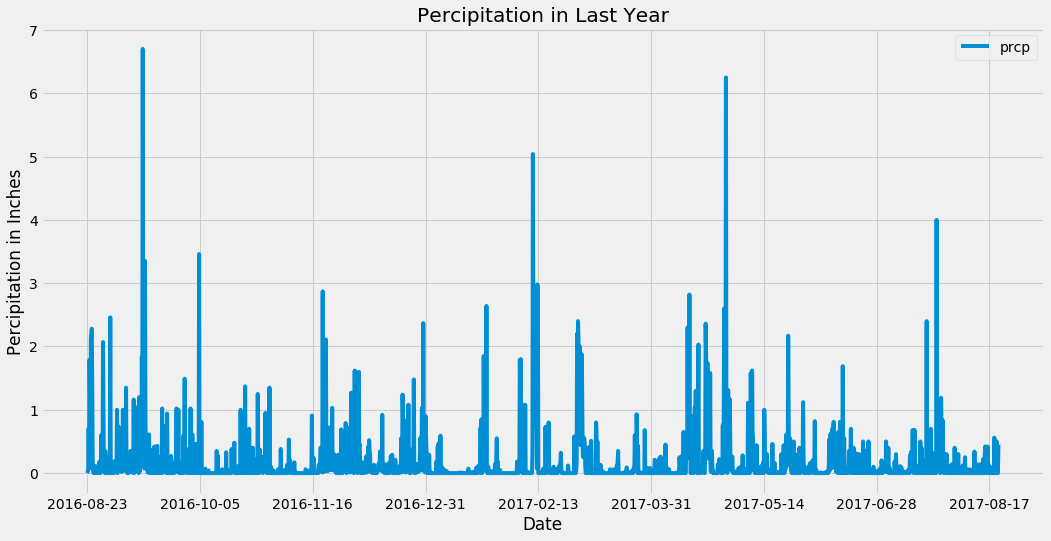

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
(final_perc.plot(title="Percipitation in Last Year", figsize=(16, 8)).set(xlabel='Date',
         ylabel='Percipitation in Inches'))
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
final_perc.describe

<bound method NDFrame.describe of             prcp
date            
2016-08-23  0.00
2016-08-23  0.02
2016-08-23  0.05
2016-08-23  0.70
2016-08-23  0.15
...          ...
2017-08-22  0.50
2017-08-23  0.00
2017-08-23  0.08
2017-08-23  0.00
2017-08-23  0.45

[2021 rows x 1 columns]>

# Exploratory Station Analysis

In [20]:
# Listing all the stations in the table
session.query(Station.station).all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [21]:
# Getting all the column names in Station table.
columns = inspector.get_columns("station")
for col in columns:
    print(col["name"],col["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [22]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(func.count(Station.station)).all()

In [23]:
# Getting all the data from the Station table.
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [24]:
# Query to find the most active stations (i.e. what stations have the most rows?)
station = [Measurement.station, func.count(Measurement.station)]
# List the stations and the counts in descending order.
station_max = (session.query(*station).group_by(Measurement.station)).order_by(func.count(Measurement.station).desc()).all()
station_max

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Most active station ID
station_id = station_max[0][0]
station_id
print(f"The most active station ID is {station_id}.")

The most active station ID is USC00519281.


In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Query to find the Lowest temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == station_id).all()
lowest_temp = lowest_temp[0][0]
print(f"Lowest temperature at the most active station is {lowest_temp} degrees Fahrenheit.")

Lowest temperature at the most active station is 54.0 degrees Fahrenheit.


In [27]:
# Query to find the Highest temperature.
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == station_id).all()
highest_temp = highest_temp[0][0]
print(f"Lowest temperature at the most active station is {highest_temp} degrees Fahrenheit.")

Lowest temperature at the most active station is 85.0 degrees Fahrenheit.


In [28]:
# Query to find the Average temperature.
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == station_id).all()
avg_temp = avg_temp[0][0]
print(f"Lowest temperature at the most active station is {avg_temp} degrees Fahrenheit.")

Lowest temperature at the most active station is 71.66378066378067 degrees Fahrenheit.


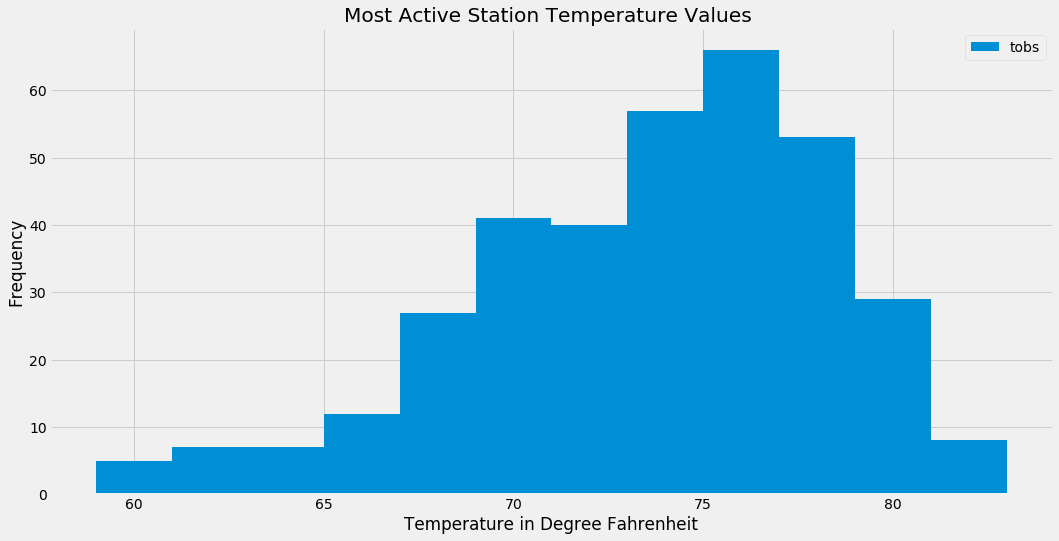

In [31]:
# Getting temperature in last year by using the most active station id
tobs_last = session.query(Measurement.date, Measurement.tobs)\
                .filter((Measurement.date >= last_year) & (Measurement.station == station_id)).all()

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Making data frame of the values for the temperature in the last year.
tobs_df = pd.DataFrame(tobs_last)

# Plotting the histogram for the temperature for the last year.
tobs_df.plot(kind="hist",title="Most Active Station Temperature Values ",bins=12, figsize=(16,8)).legend(
    loc='upper right')
plt.xlabel("Temperature in Degree Fahrenheit");

# Close session

In [30]:
# Close Session
session.close()